**Import Python Modules**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'numpy'

**Upload File**

In [70]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/psgupta94/INSE_6220/main/project_Breast_Cancer_data.csv',nrows=300)
df.head(n=10)



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,1


In [71]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          300 non-null    float64
 1   texture_mean         300 non-null    float64
 2   perimeter_mean       300 non-null    float64
 3   area_mean            300 non-null    float64
 4   smoothness_mean      300 non-null    float64
 5   compactness_mean     300 non-null    float64
 6   concavity_mean       300 non-null    float64
 7   concave points_mean  300 non-null    float64
 8   diagnosis            300 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 21.2 KB


**Classes**

In [72]:
y = df['diagnosis']
y1 = y.copy()
target = df['diagnosis'].to_numpy()



**Features**

Data Matrix

In [73]:
X = df.iloc[:,0:8]
X.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543


In [74]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,300.0,14.442953,3.549801,6.98100,11.880000,13.680000,16.750000,28.1100
texture_mean,300.0,19.319867,4.284983,9.71000,16.300000,19.060000,21.847500,39.2800
perimeter_mean,300.0,94.250900,24.485847,43.79000,76.762500,88.260000,109.775000,188.5000
area_mean,300.0,683.729333,354.620855,143.50000,432.775000,578.100000,881.725000,2499.0000
smoothness_mean,300.0,0.097980,0.013842,0.06251,0.088625,0.097460,0.106525,0.1447
compactness_mean,300.0,0.110838,0.056524,0.01938,0.068255,0.101600,0.141675,0.3454
concavity_mean,300.0,0.099588,0.082743,0.00000,0.034702,0.081305,0.145900,0.4268
concave points_mean,300.0,0.054394,0.039073,0.00000,0.023133,0.045825,0.080975,0.2012


we have noticed that the data is not standardizd. So we need to standarize the data.

In [75]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns



In [76]:
df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
radius_mean,300.0,4.278059e-16,1.001671,-2.105589,-0.723205,-0.215288,0.650995,3.856521
texture_mean,300.0,1.065814e-16,1.001671,-2.246432,-0.705933,-0.060747,0.590867,4.665942
perimeter_mean,300.0,-6.468899e-16,1.001671,-2.064262,-0.715418,-0.245077,0.635062,3.855557
area_mean,300.0,2.072416e-17,1.001671,-1.525945,-0.708852,-0.298363,0.559263,5.127458
smoothness_mean,300.0,-4.026409e-16,1.001671,-2.566770,-0.676960,-0.037615,0.618373,3.380904
compactness_mean,300.0,4.263256e-16,1.001671,-1.620742,-0.754619,-0.163706,0.546470,4.156716
concavity_mean,300.0,1.184238e-17,1.001671,-1.205596,-0.785492,-0.221329,0.560649,3.961185
concave points_mean,300.0,2.842171e-16,1.001671,-1.394449,-0.801426,-0.219683,0.681420,3.763498


the data is now standardizd.

**Observations and variables**


In [77]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,


**Data Visualisation**


Class Distribution

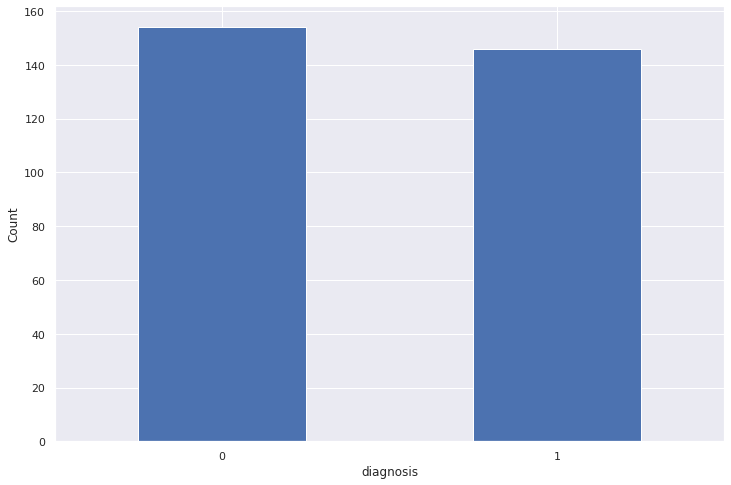

In [78]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()



**Box & Whisker Plots**

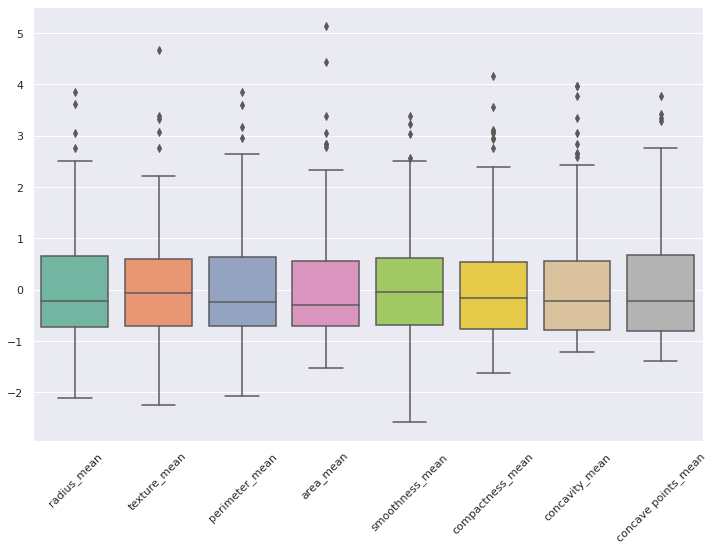

In [79]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

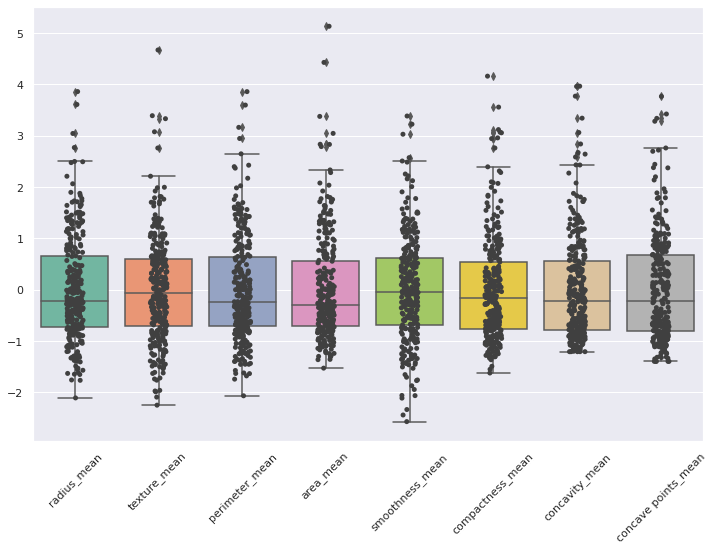

In [80]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Five Number Summary**

In [81]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.278059e-16,1.065814e-16,-6.468899e-16,2.072416e-17,-4.026409e-16,4.263256e-16,1.184238e-17,2.842171e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-2.105589e+00,-2.246432e+00,-2.064262e+00,-1.525945e+00,-2.566770e+00,-1.620742e+00,-1.205596e+00,-1.394449e+00
25%,-7.232054e-01,-7.059333e-01,-7.154182e-01,-7.088518e-01,-6.769595e-01,-7.546191e-01,-7.854925e-01,-8.014263e-01
50%,-2.152876e-01,-6.074723e-02,-2.450767e-01,-2.983632e-01,-3.761529e-02,-1.637065e-01,-2.213291e-01,-2.196831e-01
75%,6.509946e-01,5.908673e-01,6.350623e-01,5.592635e-01,6.183729e-01,5.464697e-01,5.606489e-01,6.814195e-01
max,3.856521e+00,4.665942e+00,3.855557e+00,5.127458e+00,3.380904e+00,4.156716e+00,3.961185e+00,3.763498e+00


**Pair Plot**

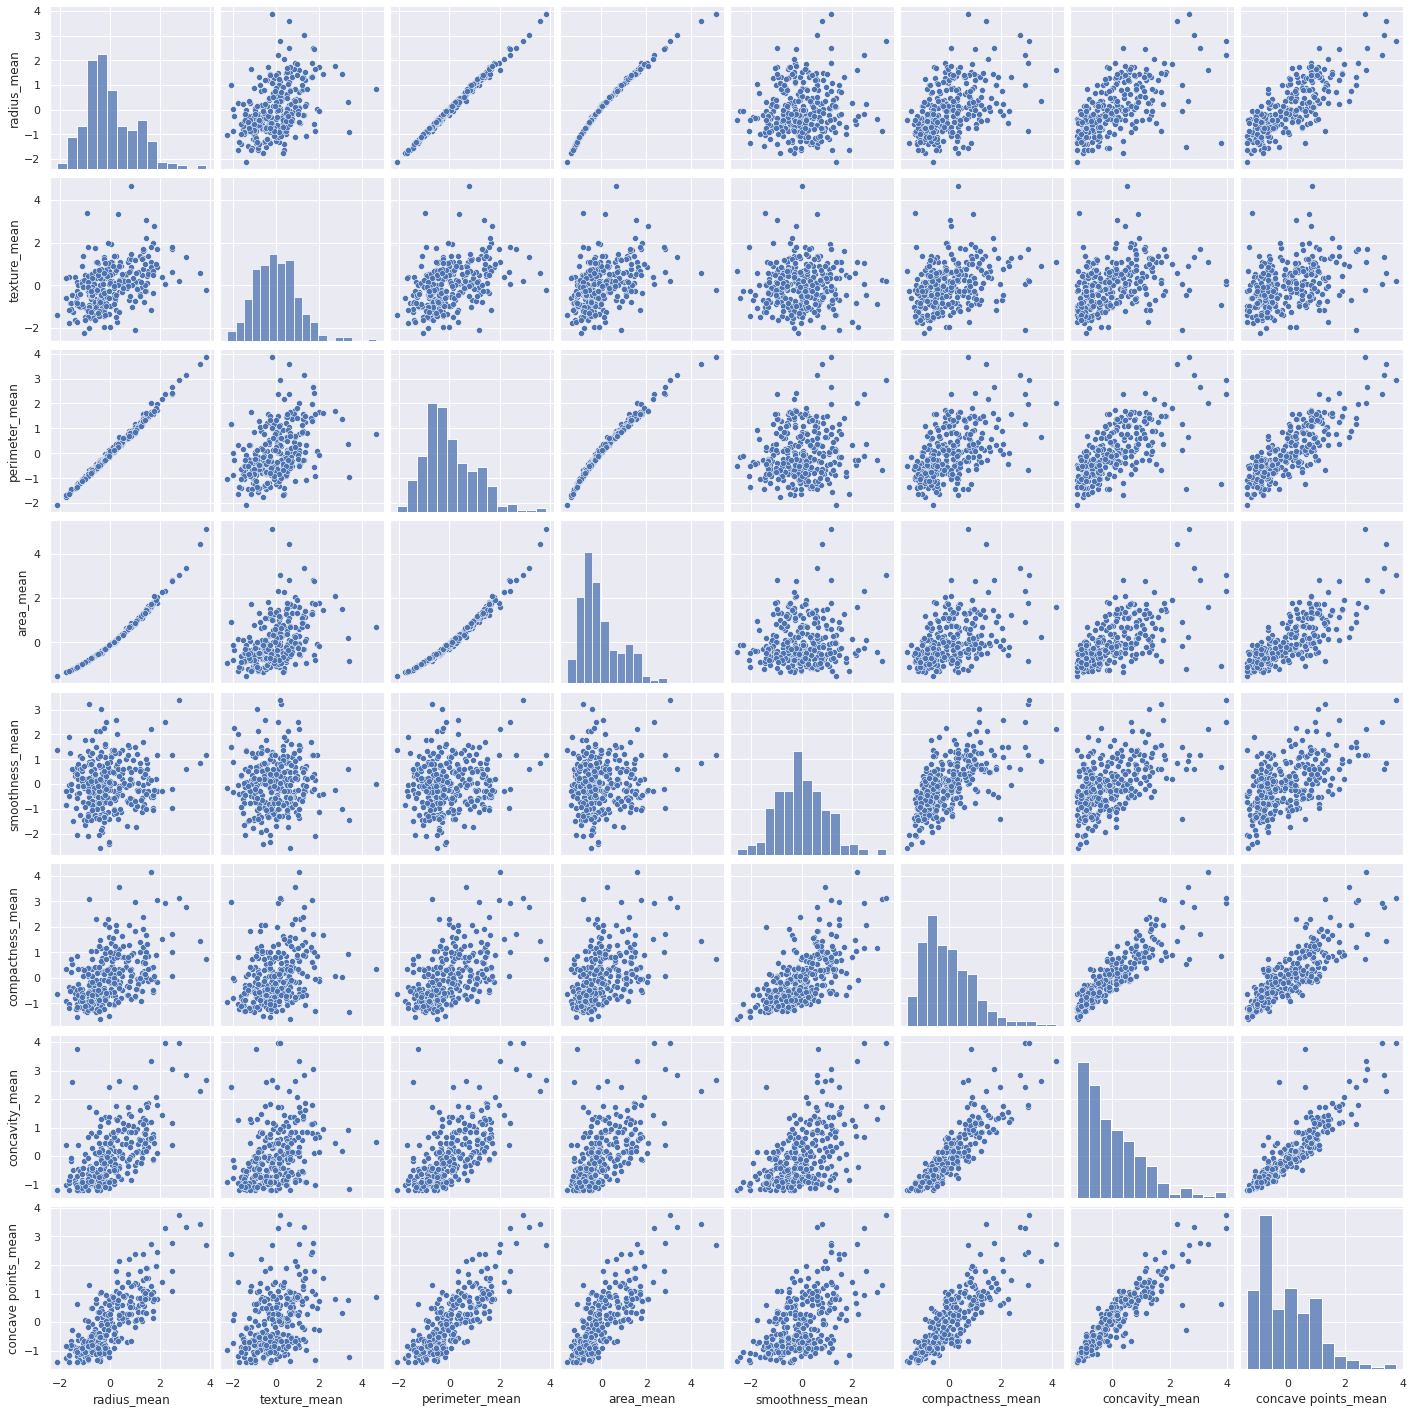

In [82]:
sns.pairplot(df)



**Covariance**

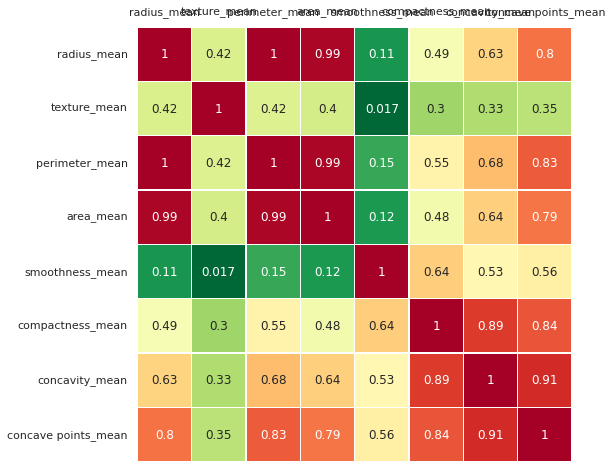

In [83]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

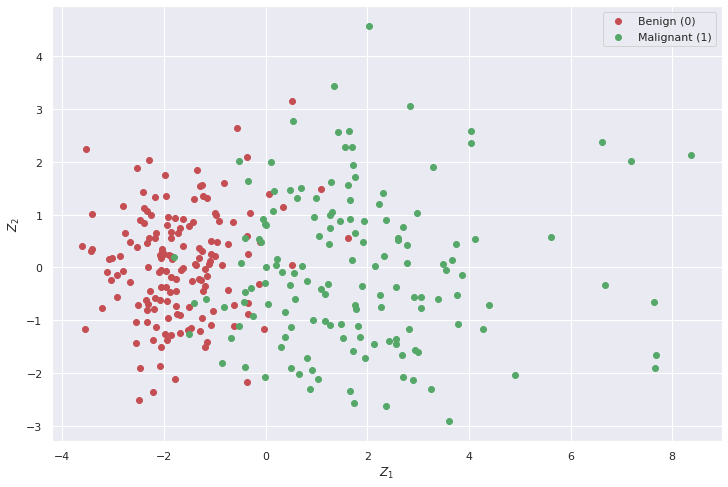

In [84]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(no_cancer)->0,  2(cancer)->1
idx_no_cancer = np.where(y == 0)
idx_cancer = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_no_cancer,0], Z[idx_no_cancer,1], c='r', label='Benign (0)')
plt.scatter(Z[idx_cancer,0], Z[idx_cancer,1], c='g', label='Malignant (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

Eigenvector matrix:
[[ 0.391 -0.329 -0.185 -0.155 -0.118  0.077 -0.461 -0.67 ]
 [ 0.208 -0.237  0.936 -0.153  0.04  -0.014  0.008  0.001]
 [ 0.402 -0.287 -0.17  -0.109 -0.153  0.079 -0.372  0.74 ]
 [ 0.389 -0.324 -0.201 -0.17   0.051  0.257  0.777 -0.034]
 [ 0.195  0.642  0.004 -0.716  0.054  0.177 -0.047  0.006]
 [ 0.352  0.392  0.122  0.423 -0.703  0.14   0.109 -0.054]
 [ 0.388  0.249  0.031  0.469  0.665  0.327 -0.131 -0.002]
 [ 0.423  0.14  -0.074  0.027  0.137 -0.874  0.113 -0.01 ]]


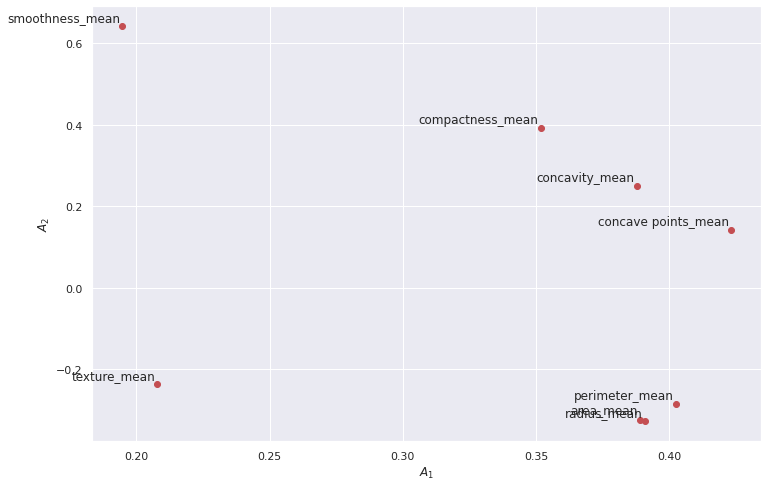

In [86]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{np.around(A,3)}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


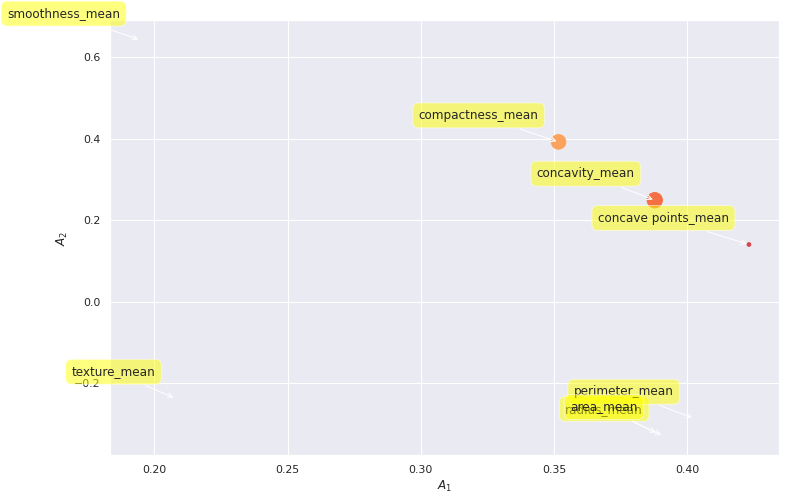

In [87]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))




**Scree plot**

[5.228 1.533 0.78  0.333 0.098 0.04  0.013 0.   ]


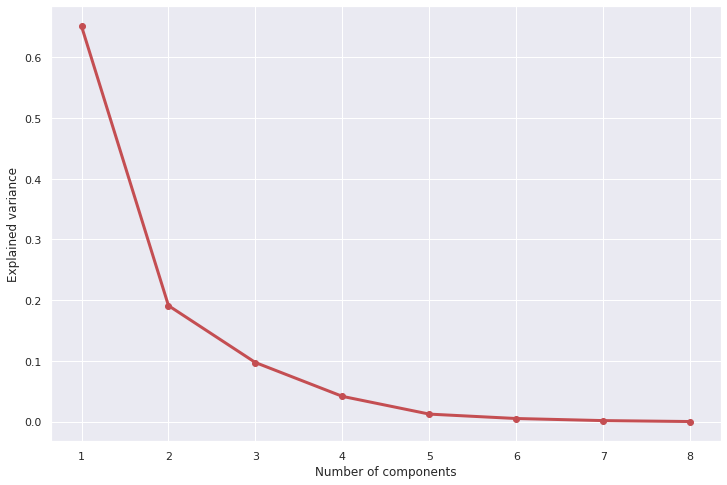

In [89]:
#Eigenvalues
Lambda = pca.explained_variance_ 
##print(f'Eigenvalues:\n{Lambda}')
c = Lambda.astype(np.float64)
print(np.around(Lambda,3))

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()



**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

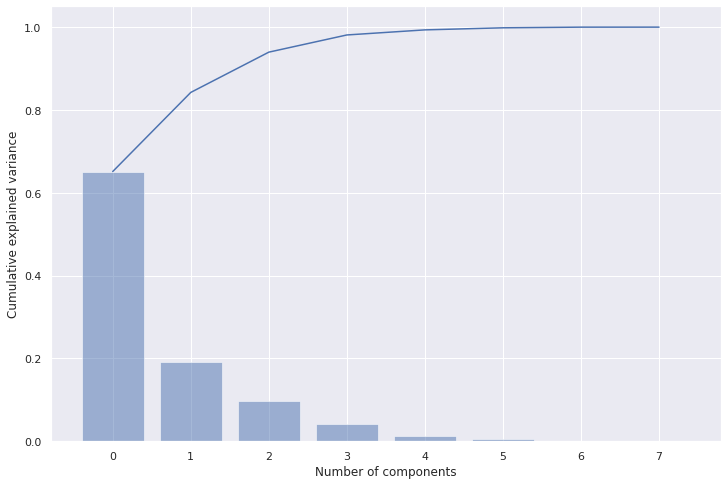

In [91]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



**Explained Variance per PC**

In [92]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance



{'0': 'PC 1 (65.1%)',
 '1': 'PC 2 (19.1%)',
 '2': 'PC 3 (9.7%)',
 '3': 'PC 4 (4.2%)',
 '4': 'PC 5 (1.2%)',
 '5': 'PC 6 (0.5%)',
 '6': 'PC 7 (0.2%)',
 '7': 'PC 8 (0.0%)'}

**Biplot**

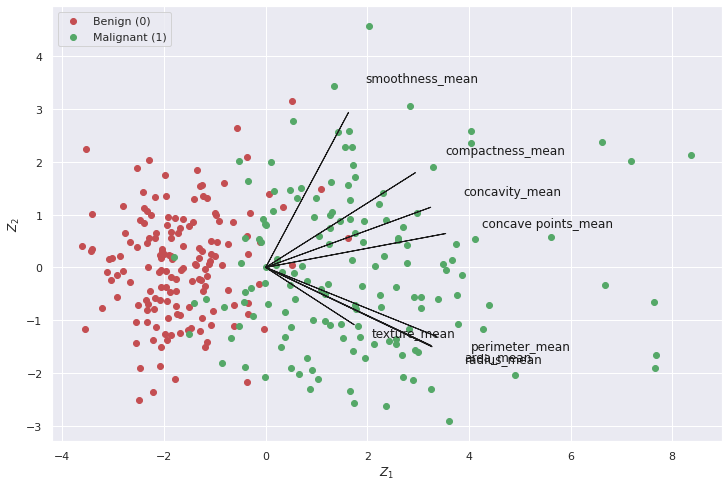

In [93]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_no_cancer,0], Z[idx_no_cancer,1], c='r', label='Benign (0)')
plt.scatter(Z[idx_cancer,0], Z[idx_cancer,1], c='g', label='Malignant (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

**Using PCA Librarry**


In [94]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [96]:
# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])



    PC              feature   loading  type
0  PC1  concave points_mean  0.423080  best
1  PC2      smoothness_mean  0.642479  best
2  PC3         texture_mean  0.935547  best
3  PC4      smoothness_mean -0.716006  best
4  PC1          radius_mean  0.390863  weak
5  PC1       perimeter_mean  0.402385  weak
6  PC1            area_mean  0.388843  weak
7  PC4     compactness_mean  0.422717  weak
8  PC4       concavity_mean  0.468786  weak


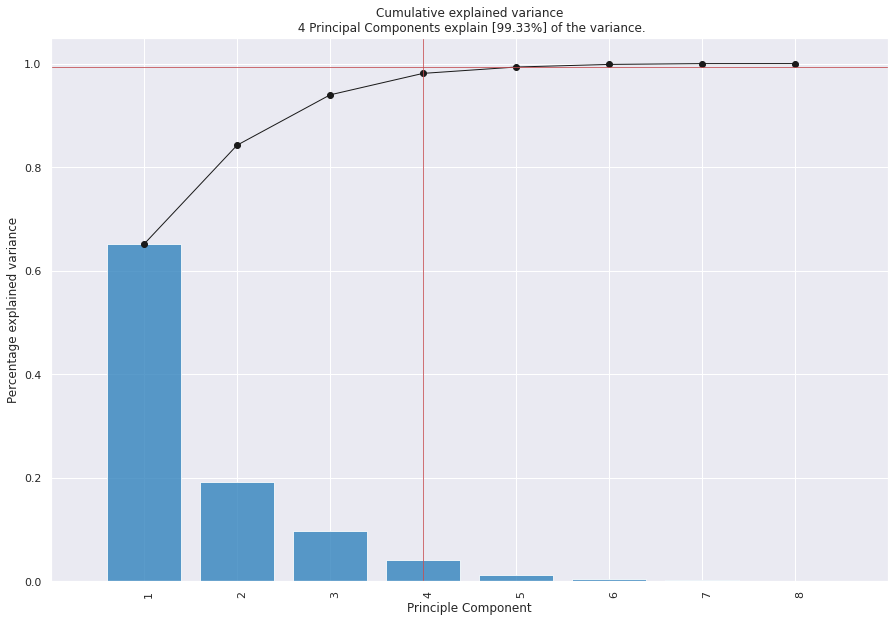

<Figure size 864x576 with 0 Axes>

In [97]:
model.plot();



[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


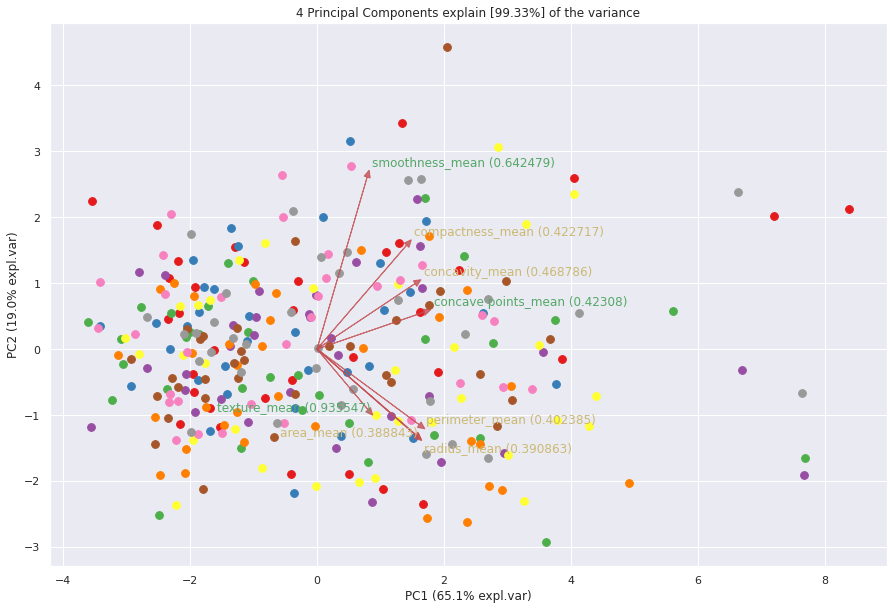

In [98]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


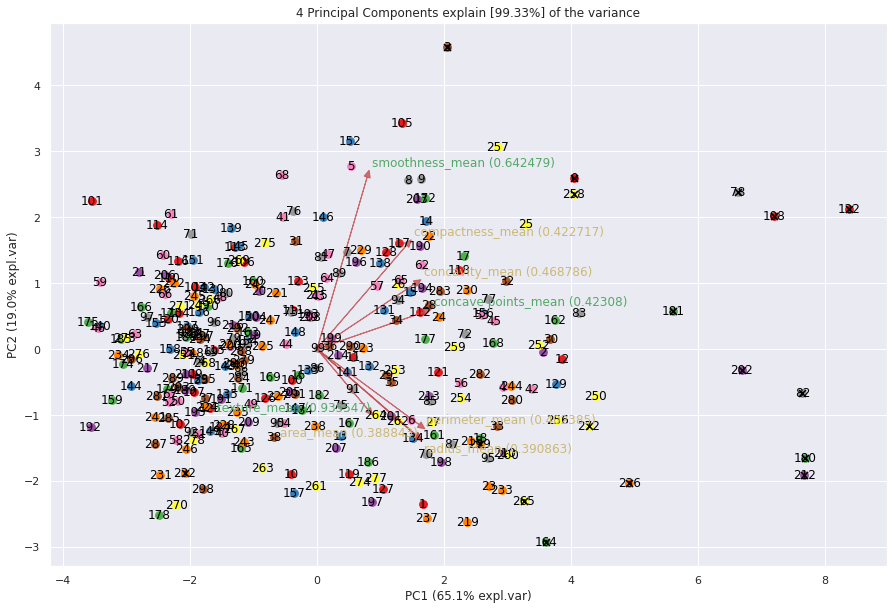

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa40b577bd0>)

In [99]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


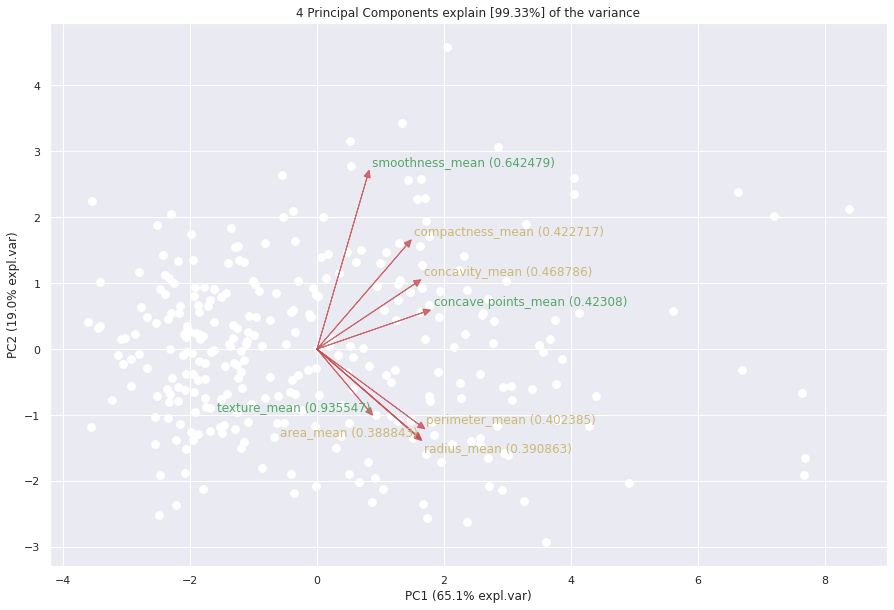

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa40bac22d0>)

In [100]:


model.biplot(cmap=None, label=False, legend=False)



[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [300] unique colors! Available unique colors: [9].


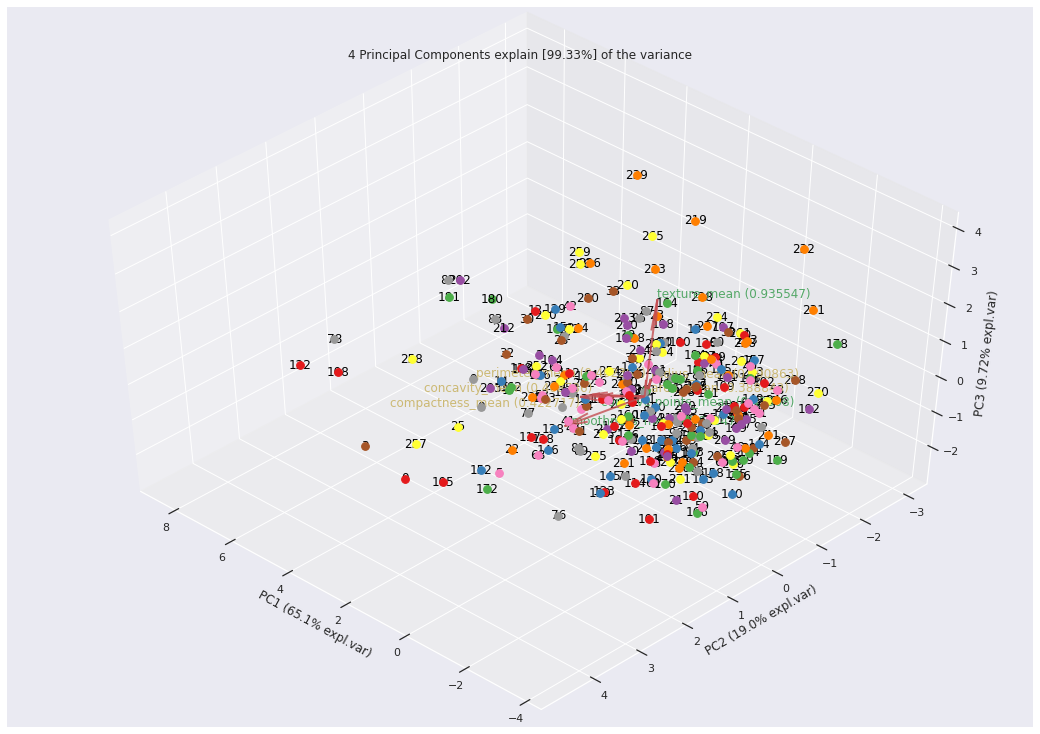

In [101]:
ax = model.biplot3d(legend=False)


**Principal components**

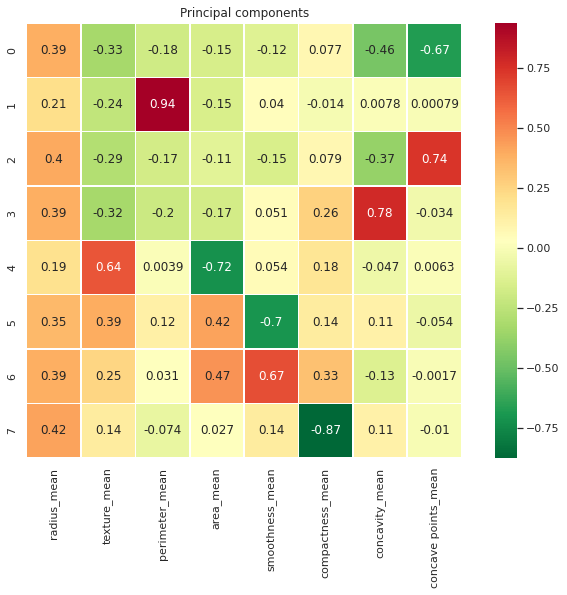

PC1:[0.39086254 0.20787067 0.40238522 0.388843   0.19467574 0.35164791
 0.38775281 0.42307964]
PC2:[-0.32857903 -0.23744706 -0.2865226  -0.32403756  0.6424787   0.39240825
  0.24916697  0.140399  ]


In [102]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')



**Hotelling's T2 test**

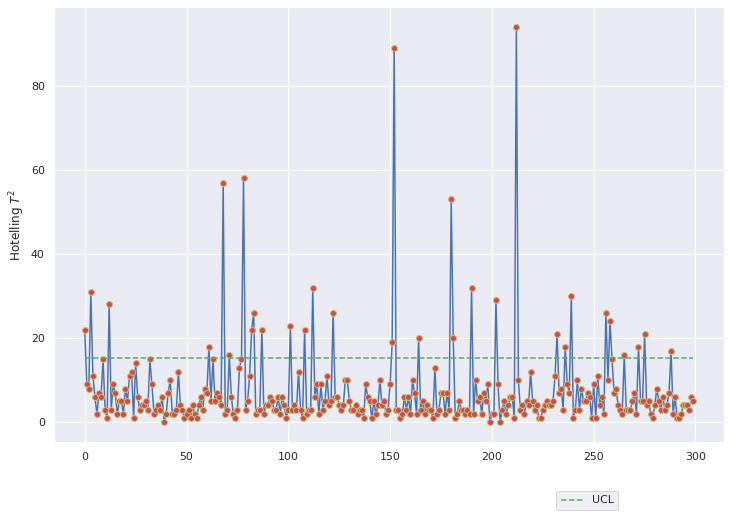

In [103]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [104]:
print(np.argwhere(Tsquare>UCL))



[[  0]
 [  3]
 [ 12]
 [ 61]
 [ 68]
 [ 71]
 [ 78]
 [ 82]
 [ 83]
 [ 87]
 [101]
 [108]
 [112]
 [122]
 [151]
 [152]
 [164]
 [180]
 [181]
 [190]
 [202]
 [212]
 [232]
 [236]
 [239]
 [256]
 [258]
 [265]
 [272]
 [275]
 [288]]


**Control Charts for Principal Components**

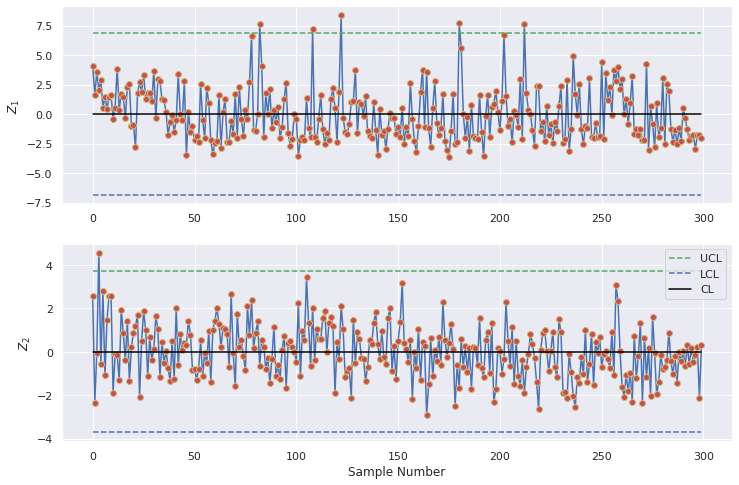

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()


Out of Control Points

In [106]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 82]
 [108]
 [122]
 [180]
 [212]]
[]
[[3]]


**Multi-Class Classification**

In [107]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y1, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y1, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y1, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']



Train Dataset Size: 210
Test Dataset Size: 90


**Gaussian Naive Bayes (GNB)**

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.920     0.920     0.920        50
           1      0.900     0.900     0.900        40

    accuracy                          0.911        90
   macro avg      0.910     0.910     0.910        90
weighted avg      0.911     0.911     0.911        90



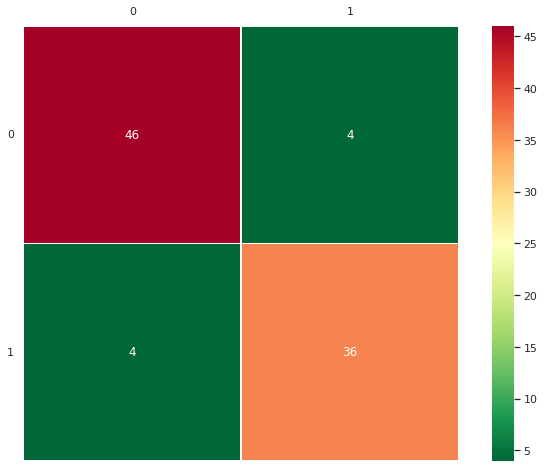

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.918     0.900     0.909        50
           1      0.878     0.900     0.889        40

    accuracy                          0.900        90
   macro avg      0.898     0.900     0.899        90
weighted avg      0.900     0.900     0.900        90



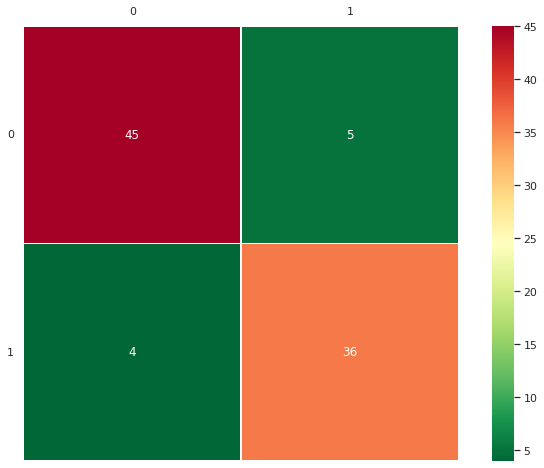

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.880     0.917        50
           1      0.864     0.950     0.905        40

    accuracy                          0.911        90
   macro avg      0.910     0.915     0.911        90
weighted avg      0.915     0.911     0.911        90



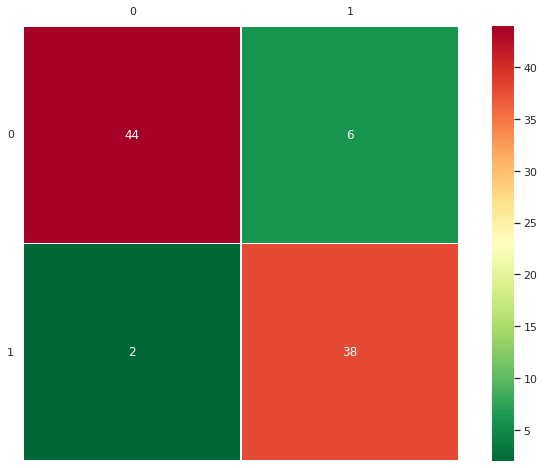

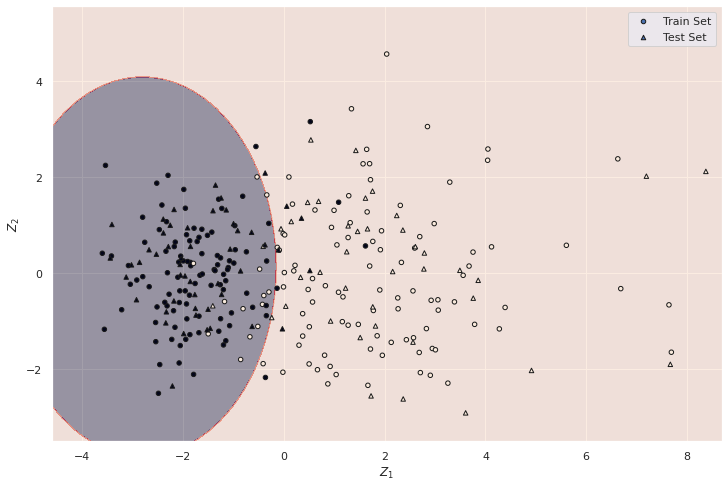

(array([ 0, 10, 41, 42, 50, 79, 84, 85]),)


In [108]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))



**K Nearest Neighbors (KNN)**

Grid Search Results:
k_full_data: {'n_neighbors': 32}
k_Z: {'n_neighbors': 32}
k_Z12: {'n_neighbors': 32}
                                    0         1         2         3         4
knn_full_data fit_time       0.002309  0.002107  0.002245  0.002151  0.002270
knn_Z  fit_time              0.001044  0.001077  0.000997  0.000963  0.001084
knn_Z12 fit_time             0.000960  0.001226  0.000926  0.000929  0.000920
knn_full_data test_f1_macro  0.807780  0.928531  0.952381  0.928531  0.928531
knn_Z  test_f1_macro         0.807780  0.928531  0.952381  0.928531  0.928531
knn_Z12 test_f1_macro        0.832479  0.928531  0.928531  0.928531  0.880885

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.880     0.917        50
           1      0.864     0.950     0.905        40

    accuracy                          0.911        90
   macro avg      0.910     0.915     0.911        90
weighted avg      0.915     0.911

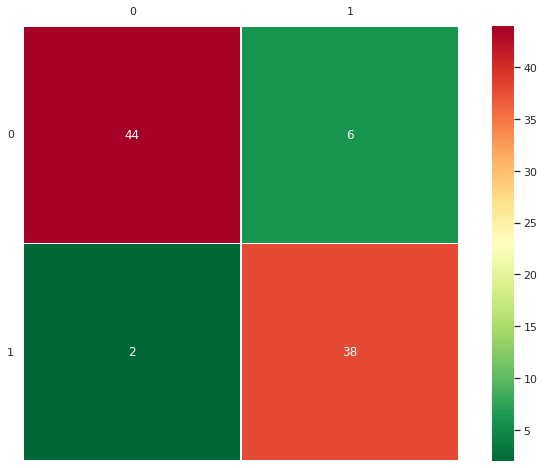

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.880     0.917        50
           1      0.864     0.950     0.905        40

    accuracy                          0.911        90
   macro avg      0.910     0.915     0.911        90
weighted avg      0.915     0.911     0.911        90



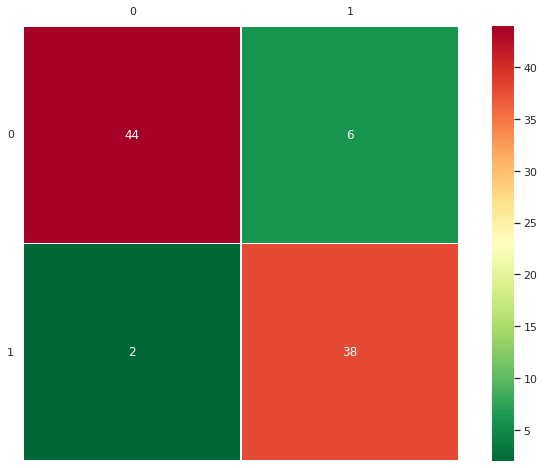

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.900     0.928        50
           1      0.884     0.950     0.916        40

    accuracy                          0.922        90
   macro avg      0.921     0.925     0.922        90
weighted avg      0.925     0.922     0.922        90



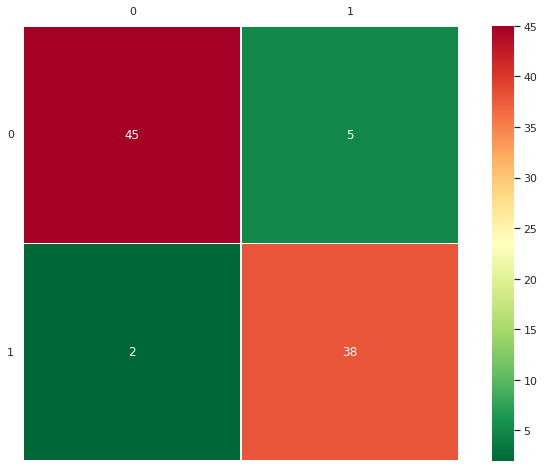

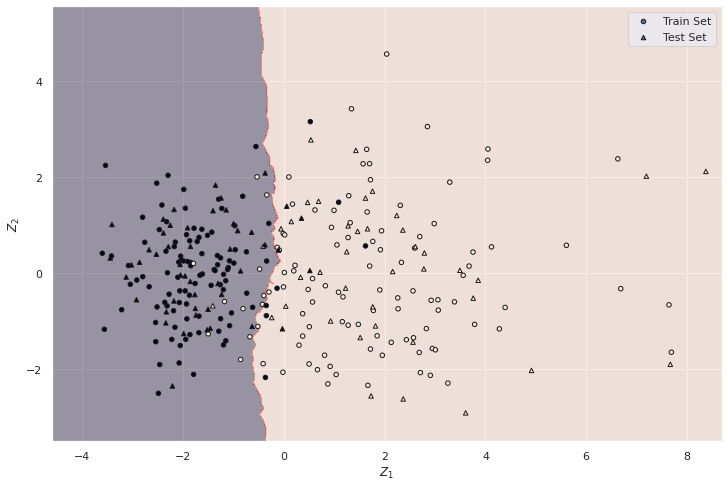

In [109]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

**Decision Trees (DT)**

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.002455  0.002221  0.002568  0.002329  0.002325
dt_Z  fit_time              0.001211  0.001137  0.001063  0.001040  0.001076
dt_Z12 fit_time             0.000855  0.000849  0.000970  0.000922  0.001157
dt_full_data test_f1_macro  0.880342  0.880885  0.856818  0.880342  0.952381
dt_Z  test_f1_macro         0.832479  0.928531  0.880342  0.857143  0.952273
dt_Z12 test_f1_macro        0.832479  0.928531  0.880342  0.880885  0.952273

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.958     0.920     0.939        50
           1      0.905     0.950     0.927        40

    accuracy                          0.933        90
   macro avg      0.932     0.935     0.933        90
weighted avg      0.935     0.933    

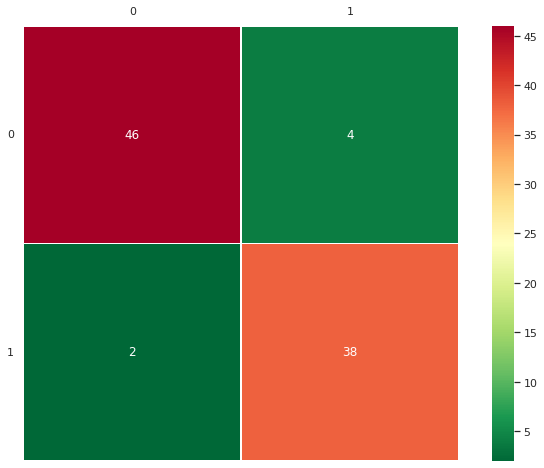

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.860     0.915        50
           1      0.848     0.975     0.907        40

    accuracy                          0.911        90
   macro avg      0.913     0.917     0.911        90
weighted avg      0.920     0.911     0.911        90



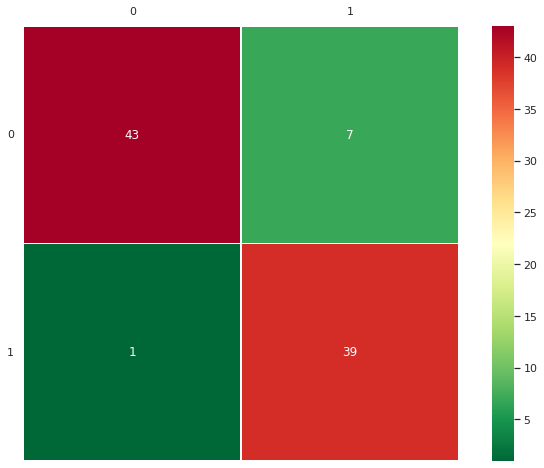

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.977     0.860     0.915        50
           1      0.848     0.975     0.907        40

    accuracy                          0.911        90
   macro avg      0.913     0.917     0.911        90
weighted avg      0.920     0.911     0.911        90



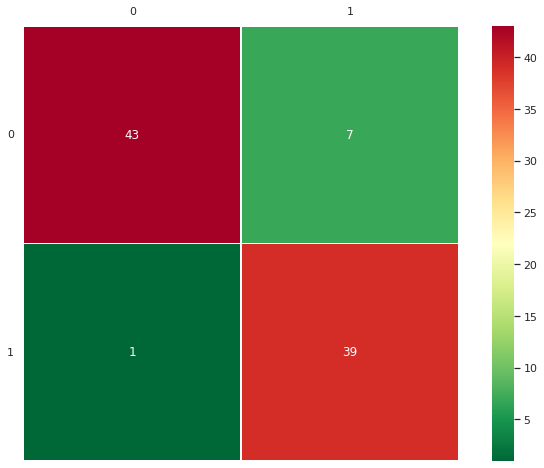

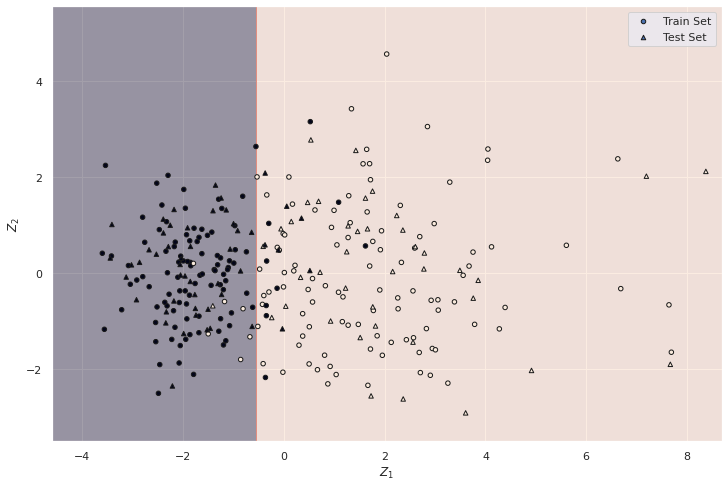

In [110]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

**ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


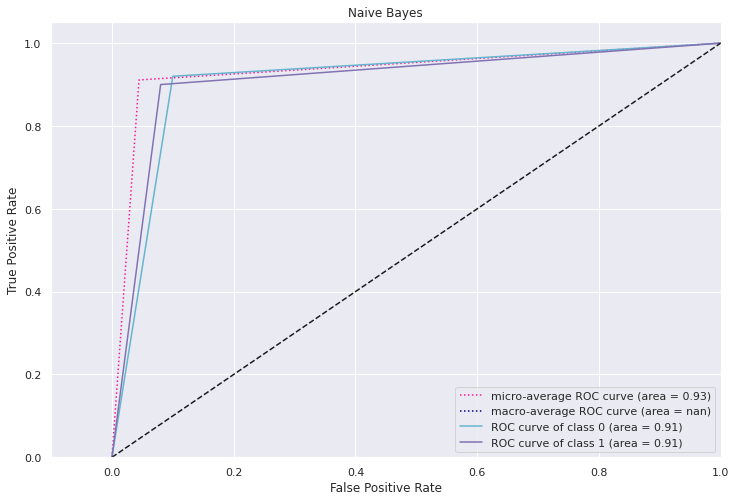

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


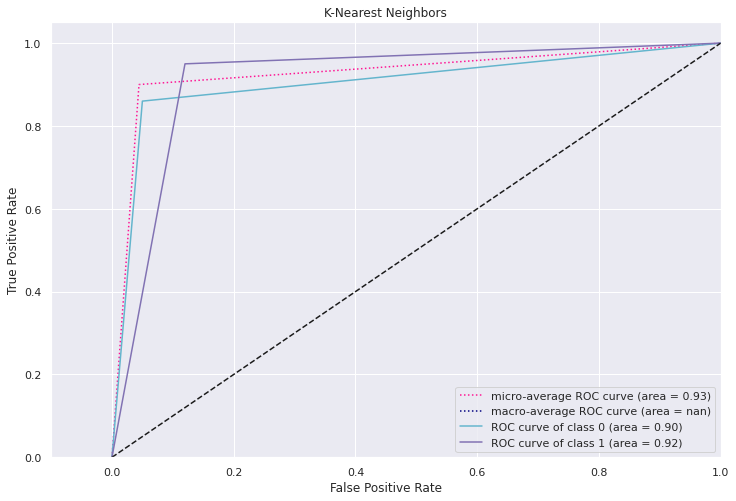

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


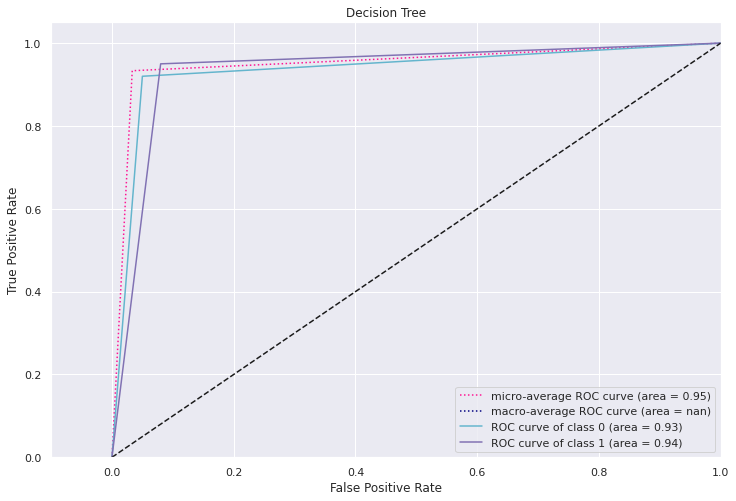

DATASET: Z


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


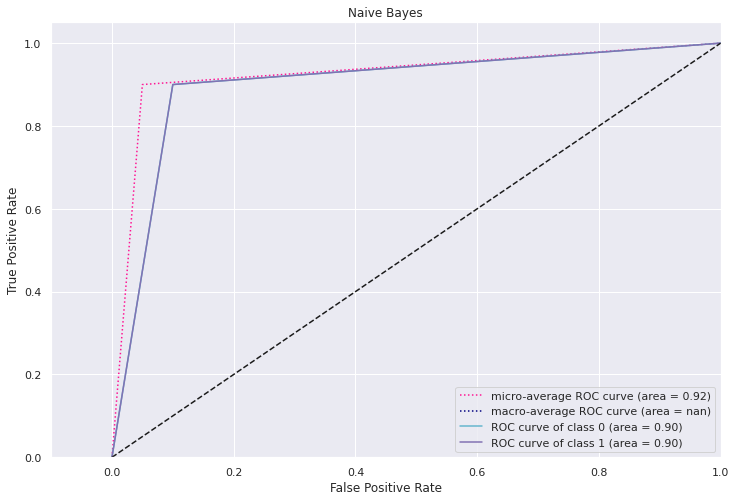

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


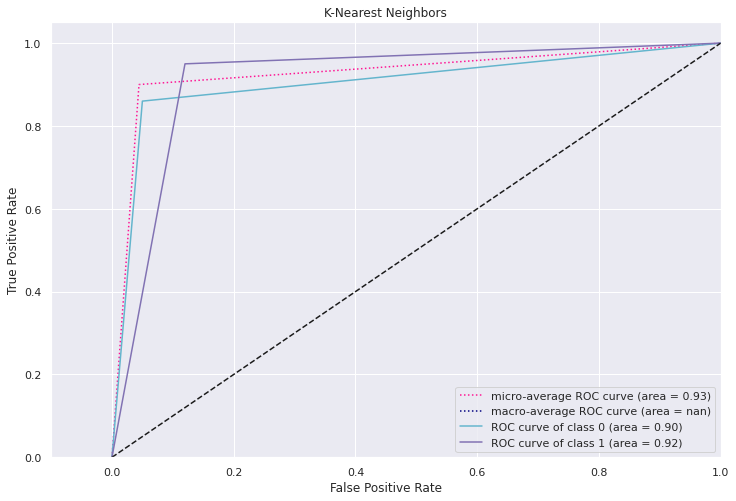

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


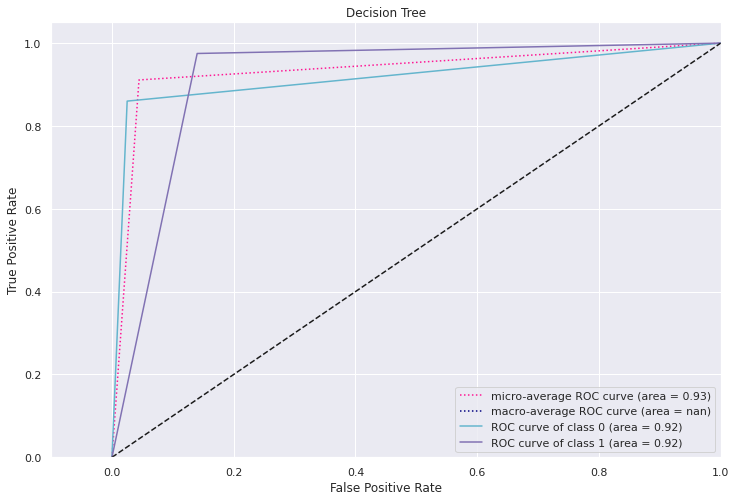

DATASET: Z12


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


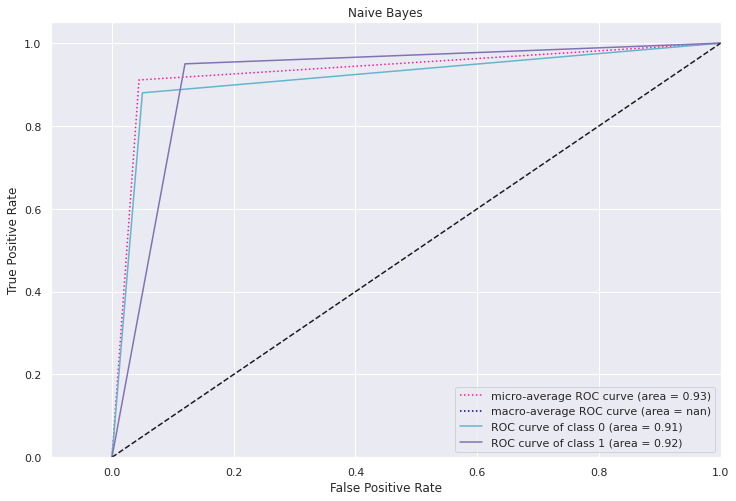

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


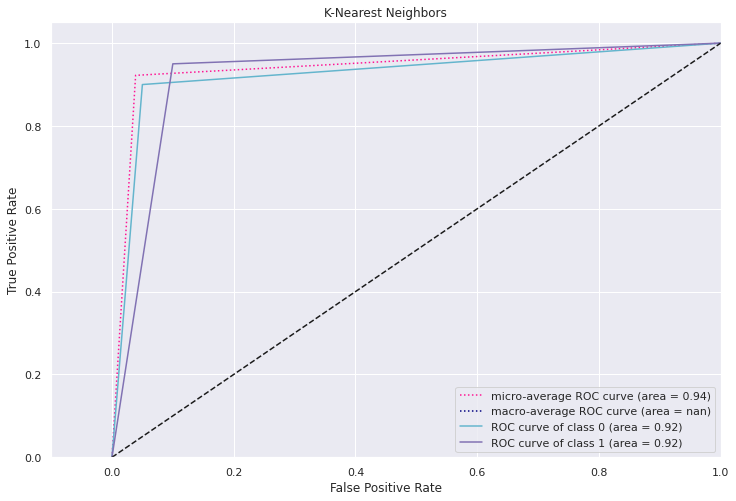

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


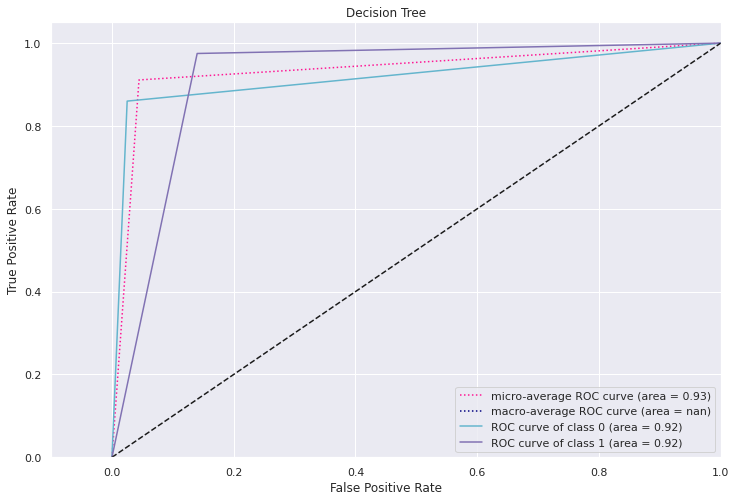

In [111]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes-1), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

**Bar Chart Plot**

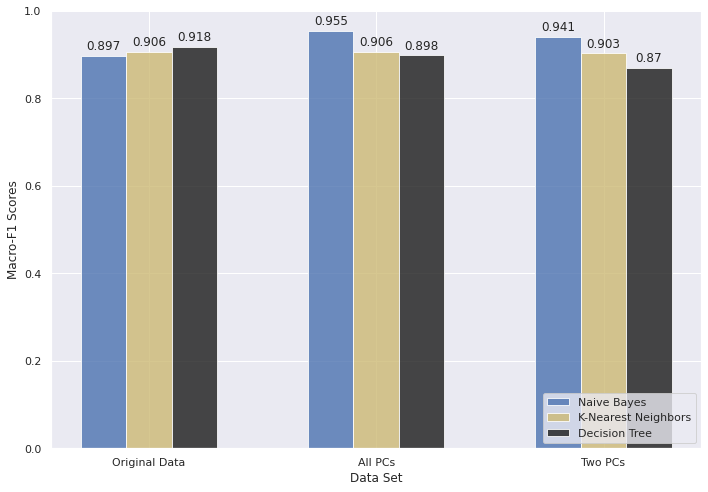

In [112]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()